QRCP:

In [1]:

# import torch

# def qrcp(B):
#     A = B.t() #the transpose
#     m, n = A.shape
#     Q = torch.eye(m, m, dtype=A.dtype, device=A.device)
#     R = A.clone()
#     P = torch.arange(n, dtype=torch.long, device=A.device)
#     for i in range(min(m, n)):
#         # Find the pivot - the column with the largest norm
#         norms = torch.norm(R[i:, i:], dim=0)
#         max_norm_col = torch.argmax(norms) + i
#         # Swap columns in R and rows in P
#         R[:, [i, max_norm_col]] = R[:, [max_norm_col, i]]
#         P[i], P[max_norm_col] = P[max_norm_col].item(), P[i].item()
#         # Compute the Householder transformation for the current column
#         x = R[i:, i]
#         rho = -torch.sign(x[0]) if x[0] != 0 else -1
#         s = torch.sqrt(0.5 * (1 + abs(rho) * x[0] / torch.norm(x)))
#         v = torch.zeros_like(x)
#         v[0] = s
#         u = (x - rho * v) / (s * x[0])
#         v = u - v
#         # Apply the transformation to R and Q
#         R[i:, i:] -= 2 * v.outer(v @ R[i:, i:])
#         Q[:, i:] -= 2 * (Q[:, i:] @ v).outer(v)
#     return P

# # Example usage
# A = torch.rand(4, 3)  # Random 4x3 matrix
# P_index = qrcp(A)

# # print("Q:", Q)
# # print("R:", R)
# # print("P:", P)
# print("P_idx:", P_index)




# def attach_qr_coreset_split(coresets, sub_train_loader, num_samples=200):

#     dataset = sub_train_loader.dataset
#     task_indices = sub_train_loader.sampler.indices
#     A = torch.stack([dataset[i][0].flatten().float() for i in task_indices])

#     P_indices = qrcp(A)

#     coreset_indices = task_indices[P_indices[:num_samples]]

#     sub_train_loader.sampler.indices = task_indices[P_indices[num_samples:]]

#     # Create a new sampler for the coreset based on the selected indices
#     coreset_sampler = torch.utils.data.SubsetRandomSampler(coreset_indices)
    
#     # Create a new DataLoader for the coreset
#     coreset_loader = torch.utils.data.DataLoader(
#         sub_train_loader.dataset, 
#         batch_size=sub_train_loader.batch_size, 
#         sampler=coreset_sampler)
    
#     # Append the new coreset DataLoader to the list of existing coresets
#     coresets.append(coreset_loader)


In [5]:
def many_coresets(num_tasks, dataloaders, coreset_method, coreset_size):
    
    coreset_list = []
    for task_id in range(num_tasks):
        trainloader, testloader = dataloaders[task_id]
        coreset_method(coreset_list, trainloader, num_samples=coreset_size)
    return coreset_list

In [3]:
# import dataset
# import coresets
# from coresets import attach_kCenter_coreset_split

# class_distribution = [[0, 1],[2, 3],[4, 5],[6, 7],[8, 9]]
# batch_size = 250

In [4]:


# dataloaders = dataset.SplitMnistDataloader(class_distribution, batch_size, not_mnist=True)
# trainloader, testloader = dataloaders[0]

# print(len(trainloader.sampler.indices))
# c = []
# num_samples = 10
# coresets.attach_qr_coreset_split(c, trainloader, num_samples=num_samples)
# c[0].sampler.indices

# print(len(trainloader.sampler.indices))

In [5]:
# dataloaders = dataset.SplitMnistDataloader(class_distribution, batch_size)
# trainloader, testloader = dataloaders[0]
# c_k = []
# num_samples = 10
# coresets.attach_kCenter_coreset_split(c_k, trainloader, num_samples=num_samples)
# c_k[0].sampler.indices

In [6]:
# dataloaders = dataset.SplitMnistDataloader(class_distribution, batch_size)
# trainloader, testloader = dataloaders[0]
# c_r = []
# num_samples = 10
# coresets.attach_random_coreset_split(c_r, trainloader, num_samples=num_samples)
# c_r[0].sampler.indices

Advanced version:

In [34]:
import dataset
import coresets

class_distribution = [[0, 1],[2, 3],[4, 5],[6, 7],[8, 9]]
batch_size = 250
coreset_size = 20

num_tasks = 5

#get_dataset = lambda: dataset.SplitCifar10Dataloader(class_distribution, batch_size)
get_dataset = lambda: dataset.SplitMnistDataloader(class_distribution, batch_size, not_mnist=False)


In [35]:
print("qr")
dataloaders = get_dataset()
coreset_method = coresets.attach_qr_coreset_split
c = many_coresets(num_tasks, dataloaders, coreset_method, coreset_size)

print("random")
dataloaders = get_dataset()
coreset_method = coresets.attach_random_coreset_split
c_r = many_coresets(num_tasks, dataloaders, coreset_method, coreset_size)

print("k-center")
dataloaders = get_dataset()
coreset_method = coresets.attach_kCenter_coreset_split
c_k = many_coresets(num_tasks, dataloaders, coreset_method, coreset_size)


qr
random
k-center


In [ ]:
classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
a = [1,2,3,4]
classes[a[1]]


'bird'

In [ ]:
# def plot_row(axes, i, images, labels, name, num_col, classes):
#     axes[0,i].set_ylabel(name, fontsize=15, fontweight="bold")
#     for i in range(num_col):
#         #ax = axes[i//num_col, i%num_col]
#         ax = axes[0, i]
#         ax.imshow(images[i], cmap='gray')
#         ax.set_title('Label: {}'.format(classes[labels[i]]))

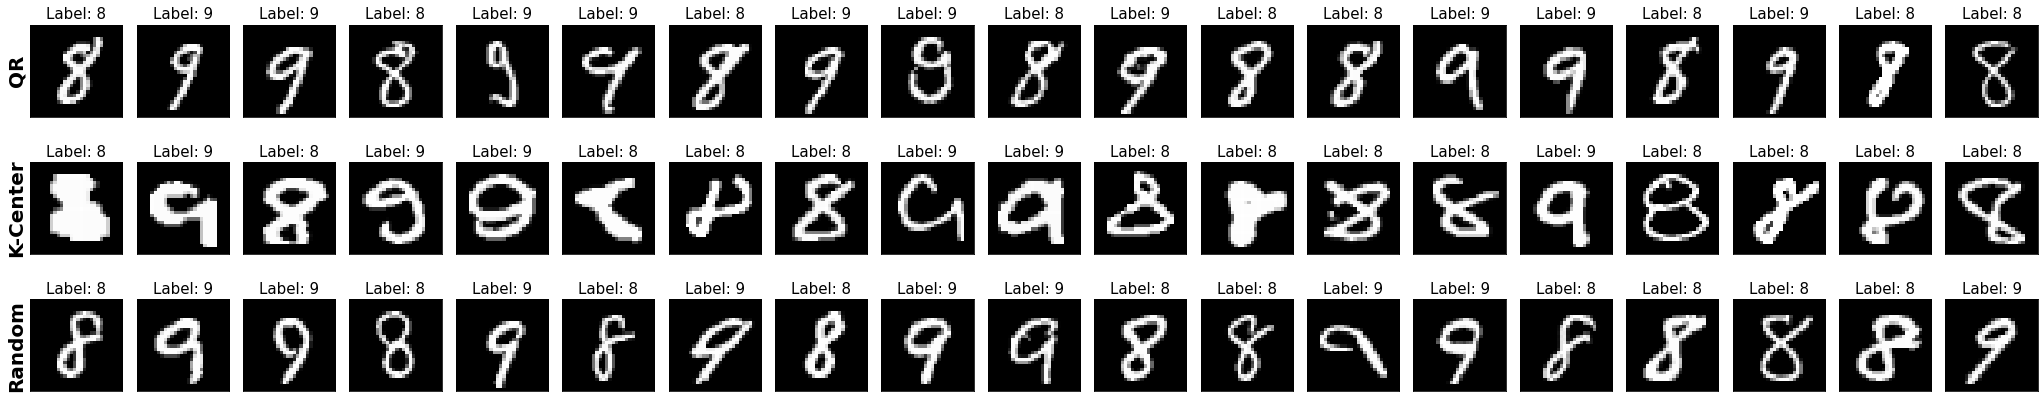

In [43]:
import matplotlib.pyplot as plt
num_row = 3
num_col = 20-1
task = 4
#classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
classes = range(10)

dataloaders = get_dataset()
trainloader, testloader = dataloaders[0]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
#fig.suptitle("First 10 coreset elemenents: Task {t}".format(t=task+1))

cc = [c,c_k,c_r]
cc_name = ["QR", "K-Center", "Random"]

for row in range(3):
    coreset = cc[row]
    images = [trainloader.dataset[idx][0][0] for idx in coreset[task].sampler.indices][1:]
    labels = [trainloader.dataset[idx][1] for idx in coreset[task].sampler.indices][1:]

    axes[row, 0].set_ylabel(cc_name[row], fontsize=20, fontweight="bold")
    for col in range(num_col):
        ax = axes[row, col]
        ax.imshow(images[col], cmap='gray')
        ax.set_title('Label: {}'.format(classes[labels[col]]), fontsize=15)


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout()
plt.show()

# COLOURED
See colab: https://colab.research.google.com/drive/1WztQAxTo_NFMkJWcCIMKwLU43AKHvXvH#scrollTo=paFeGYHi6e9w 

Files already downloaded and verified
Files already downloaded and verified


c:\Users\Dell 5520\Downloads\10\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


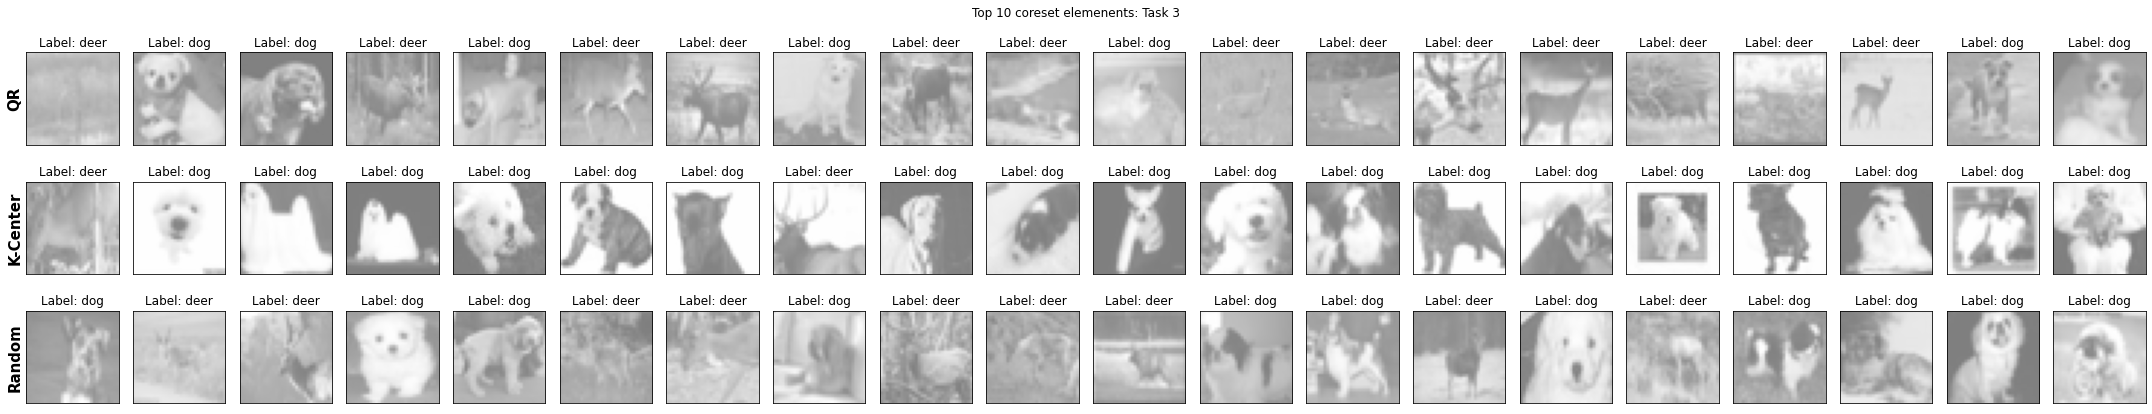

# Does saving coresets make sense?

c:\Users\Dell 5520\Downloads\10\dataset.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


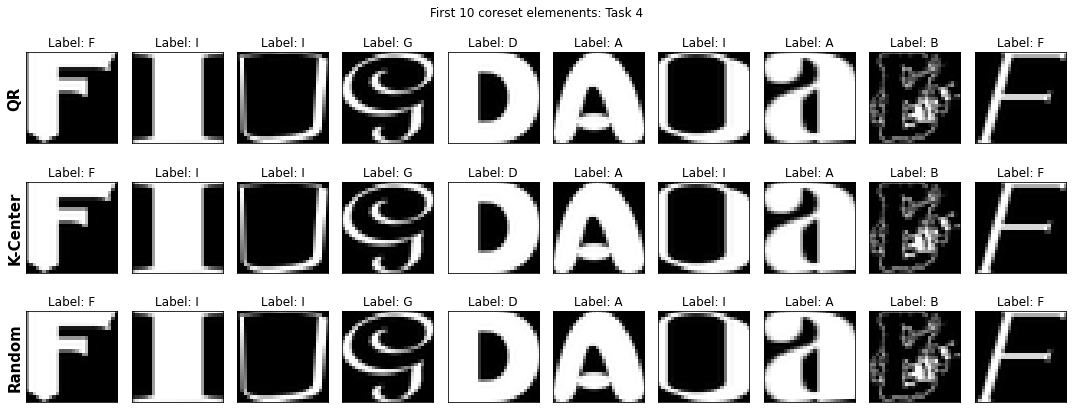

In [4]:
import matplotlib.pyplot as plt
num_row = 3
num_col = 10
task = 3
#classes = ["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

dataloaders = get_dataset()
trainloader, testloader = dataloaders[0]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("First 10 coreset elemenents: Task {t}".format(t=task+1))

cc = [range(10), range(10), range(10)]
cc_name = ["QR", "K-Center", "Random"]

for row in range(3):
    coreset = cc[row]
    dataloaders = get_dataset()
    trainloader, testloader = dataloaders[0]
    images = [trainloader.dataset[idx][0][0] for idx in coreset]
    labels = [trainloader.dataset[idx][1] for idx in coreset]

    axes[row, 0].set_ylabel(cc_name[row], fontsize=15, fontweight="bold")
    for col in range(num_col):
        #ax = axes[i//num_col, i%num_col]
        ax = axes[row, col]
        ax.imshow(images[col], cmap='gray')
        ax.set_title('Label: {}'.format(classes[labels[col]]))


plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout()
plt.show()